In [17]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [18]:
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)
X = lfw_people.data
y = lfw_people.target

In [19]:
n_samples, h, w = lfw_people.images.shape
class_names = lfw_people.target_names
n_features = X.shape[1]
n_classes = len(class_names)

In [20]:
print("Number of samples:", n_samples)
print("Image dimensions:", (h, w))
print("Number of features per sample:", n_features)
print("Number of classes:", n_classes)

Number of samples: 196
Image dimensions: (50, 37)
Number of features per sample: 1850
Number of classes: 2


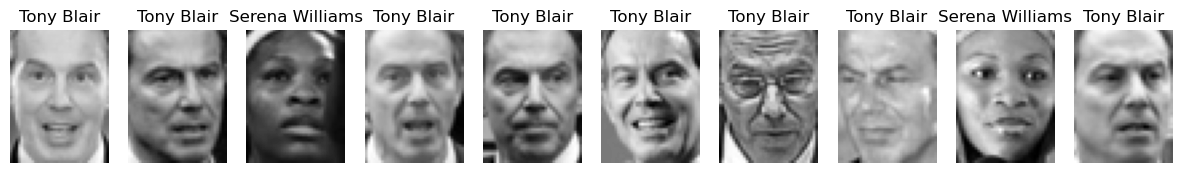

In [21]:
fig, ax = plt.subplots(1, 10, figsize=(15, 8))
for i in range(10):
    ax[i].imshow(X[i].reshape((h, w)), cmap='gray')
    ax[i].set_title(class_names[y[i]])
    ax[i].axis('off')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
pca = PCA(n_components=147, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [30]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=class_names)
    print("Accuracy:", acc)
    print("Classification Report:\n", report)
    return acc, report
acc, report = evaluate_model(log_reg, X_test_pca, y_test)
acc, report

Accuracy: 0.5714285714285714
Classification Report:
                  precision    recall  f1-score   support

Serena Williams       0.30      0.58      0.40        12
     Tony Blair       0.81      0.57      0.67        37

       accuracy                           0.57        49
      macro avg       0.56      0.58      0.53        49
   weighted avg       0.68      0.57      0.60        49



(0.5714285714285714,
 '                 precision    recall  f1-score   support\n\nSerena Williams       0.30      0.58      0.40        12\n     Tony Blair       0.81      0.57      0.67        37\n\n       accuracy                           0.57        49\n      macro avg       0.56      0.58      0.53        49\n   weighted avg       0.68      0.57      0.60        49\n')

In [32]:
print('===Logistic Regression===')
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_pca, y_train)
evaluate_model(log_reg, X_test_pca, y_test)

===Logistic Regression===
Accuracy: 0.5714285714285714
Classification Report:
                  precision    recall  f1-score   support

Serena Williams       0.30      0.58      0.40        12
     Tony Blair       0.81      0.57      0.67        37

       accuracy                           0.57        49
      macro avg       0.56      0.58      0.53        49
   weighted avg       0.68      0.57      0.60        49



(0.5714285714285714,
 '                 precision    recall  f1-score   support\n\nSerena Williams       0.30      0.58      0.40        12\n     Tony Blair       0.81      0.57      0.67        37\n\n       accuracy                           0.57        49\n      macro avg       0.56      0.58      0.53        49\n   weighted avg       0.68      0.57      0.60        49\n')

In [37]:
print('\n===Decision Tree Classifier===')
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_pca, y_train)
evaluate_model(dec_tree, X_test_pca, y_test)


===Decision Tree Classifier===
Accuracy: 0.9591836734693877
Classification Report:
                  precision    recall  f1-score   support

Serena Williams       0.86      1.00      0.92        12
     Tony Blair       1.00      0.95      0.97        37

       accuracy                           0.96        49
      macro avg       0.93      0.97      0.95        49
   weighted avg       0.97      0.96      0.96        49



(0.9591836734693877,
 '                 precision    recall  f1-score   support\n\nSerena Williams       0.86      1.00      0.92        12\n     Tony Blair       1.00      0.95      0.97        37\n\n       accuracy                           0.96        49\n      macro avg       0.93      0.97      0.95        49\n   weighted avg       0.97      0.96      0.96        49\n')

In [36]:
print('\n=== Random Forest Classifier ===')
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(X_train_pca, y_train)
evaluate_model(rand_forest, X_test_pca, y_test)


=== Random Forest Classifier ===
Accuracy: 0.8163265306122449
Classification Report:
                  precision    recall  f1-score   support

Serena Williams       1.00      0.25      0.40        12
     Tony Blair       0.80      1.00      0.89        37

       accuracy                           0.82        49
      macro avg       0.90      0.62      0.65        49
   weighted avg       0.85      0.82      0.77        49



(0.8163265306122449,
 '                 precision    recall  f1-score   support\n\nSerena Williams       1.00      0.25      0.40        12\n     Tony Blair       0.80      1.00      0.89        37\n\n       accuracy                           0.82        49\n      macro avg       0.90      0.62      0.65        49\n   weighted avg       0.85      0.82      0.77        49\n')

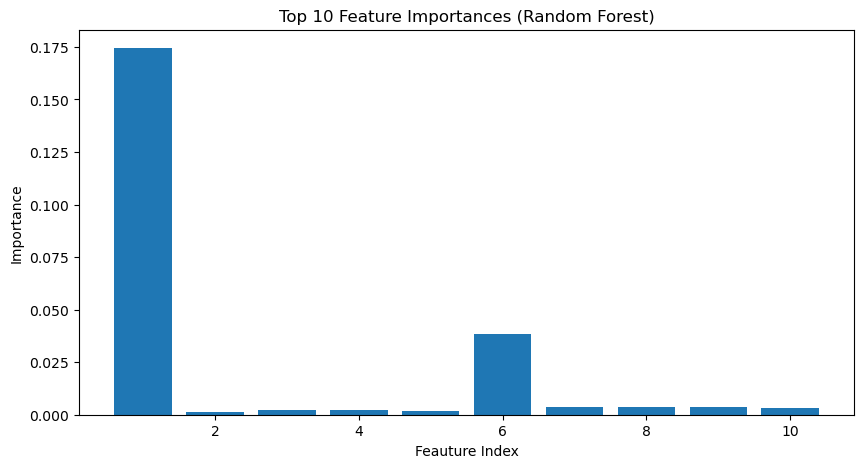

In [38]:
importances = rand_forest.feature_importances_
plt.figure(figsize=(10, 5))
plt.bar(range(1, 11), importances[:10])
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Feauture Index')
plt.ylabel('Importance')
plt.show()

In [39]:
print('\nSummary (yeaah):')
print('Logistic Regression: Effective for lier decision boudaries.')
print('Decision Tree: More flexible but prone to overfitting.')
print('Random Forest: Combines multiple trees for robust predictions. byebye.')


Summary (yeaah):
Logistic Regression: Effective for lier decision boudaries.
Decision Tree: More flexible but prone to overfitting.
Random Forest: Combines multiple trees for robust predictions. byebye.
